**CancerGenomicEpidemiology - Mutational Signature Analysis Demo**

In this demo you will learn to use some of the available tools to perform a simple mutational signature analysis. You will see examples of signatures which are caused by environmental exposures and learn how to integrate basic metadata to interpret results.

For this excercise, form up into small groups of 3-4 people. You can all run the exercise individualy or norminate someone to run it. After completing steps 3, 4 and 5, stop and review the outputs and discuss the questions with your groups before moving on.

**Step 1** - Install and import the packages needed for the analysis

In [4]:
!pip install sigprofilerassignment pandas matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.7/72.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.0/329.0 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.5/47.5 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 39.4 MB/s eta 0:00:00


In [5]:
# Import libraries
from SigProfilerAssignment import Analyzer as Analyze
import sigProfilerPlotting as sigPlt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


**Step 2** - Generate a synthetic dataset which has three different cancer types to practise mutational signature analysis.

We first need to load in the reference cancer signatures (COSMIC_v3.4_SBS_GRCh38.txt)

Note - this is a very simplistic dataset, in real datasets there is typically more variation and additional signatures present


In [6]:
from google.colab import files
uploaded = files.upload()

Saving COSMIC_v3.4_SBS_GRCh38.txt to COSMIC_v3.4_SBS_GRCh38 (1).txt


In [7]:
# Load SBS96 reference and check
sbs_ref = pd.read_table("COSMIC_v3.4_SBS_GRCh38.txt", sep="\t", index_col=0)
sbs_ref.head()

,SBS1,SBS2,SBS3,SBS4,SBS5,SBS6,SBS7a,SBS7b,SBS7c,SBS7d,...,SBS90,SBS91,SBS92,SBS93,SBS94,SBS95,SBS96,SBS97,SBS98,SBS99
Type,,,,,,,,,,,,,,,,,,,,,
A[C>A]A,0.000876,5.789892e-07,0.020920,0.042451,0.012052,0.000425,0.000067,0.002344,0.004841,0.000040,...,0.002222,0.002934,0.011396,0.011628,0.015677,0.038614,0.011463,0.008222,0.008776,0.000004
A[C>A]C,0.002220,1.455043e-04,0.016343,0.032990,0.009337,0.000516,0.000177,0.000457,0.001135,0.000754,...,0.000704,0.052013,0.009653,0.008011,0.024523,0.017212,0.007675,0.007456,0.006645,0.000007
A[C>A]G,0.000180,5.361706e-05,0.001808,0.016116,0.001908,0.000053,0.000073,0.000192,0.000388,0.000257,...,0.000144,0.000209,0.004851,0.001817,0.001627,0.008632,0.002057,0.001423,0.033740,0.000053
A[C>A]T,0.001265,9.758841e-05,0.012265,0.029663,0.006636,0.000180,0.000249,0.000714,0.001964,0.004051,...,0.001771,0.000130,0.007800,0.008457,0.011141,0.023409,0.011838,0.006908,0.003744,0.000031
A[C>G]A,0.001839,2.226114e-16,0.019813,0.006931,0.010144,0.000471,0.000065,0.000009,0.001123,0.001181,...,0.000513,0.000242,0.003074,0.008898,0.007048,0.003636,0.009321,0.002365,0.006875,0.000450


In [8]:

# Generate Synthetic Datatset

# Define Cancer Types and Proportions
cancer_sigs = {
    "Melanoma": [
        ("None",
         ["SBS7a", "SBS7b", "SBS1", "SBS5", "SBS18"],
         [0.42, 0.42, 0.05, 0.06, 0.05])
    ],
    "Lung": [
        ("Smoker",
         ["SBS4", "SBS1", "SBS5", "SBS18"],
         [0.80, 0.05, 0.10, 0.05]),
        ("NonSmoker",
         ["SBS1", "SBS5", "SBS18"],
         [0.2, 0.75, 0.05])
    ],
    "Breast": [
        ("HR_Deficient",
         ["SBS3", "SBS1", "SBS5", "SBS18"],
         [0.80, 0.05, 0.10, 0.05]),
        ("HR_Proficient",
         ["SBS1", "SBS5", "SBS18"],
         [0.1, 0.85, 0.05])
    ]
}

n_samples = 10
cancer_counts = {cancer: 1 for cancer in cancer_sigs}
synthetic_samples = {}
metadata = []

# Define burdens
def draw_mutation_burden(cancer, subgroup):
    """
    Draw a biologically plausible mutation burden depending on cancer type
    and subgroup.
    """
    if cancer == "Melanoma":
        return np.random.randint(20000, 50000)

    if cancer == "Lung":
        if subgroup == "Smoker":
            return np.random.randint(10000, 50000)
        else:
            return np.random.randint(5000, 15000)

    if cancer == "Breast":
        if subgroup == "HR_Deficient":
            return np.random.randint(10000, 30000)
        else:
            return np.random.randint(5000, 15000)


for cancer, subgroups in cancer_sigs.items():
    for subgroup, sigs, base_weights in subgroups:

        # Dirichlet control for variation in proportions
        alpha = np.array(base_weights) * 20

        for _ in range(n_samples):
            sample_name = f"{cancer}_{cancer_counts[cancer]}"
            cancer_counts[cancer] += 1

            # Draw mutation burden by subgroup
            total_mut = draw_mutation_burden(cancer, subgroup)

            # Sample per-sample signature proportions
            weights = np.random.dirichlet(alpha)

            # Generate mutations per signature
            profile = np.zeros(96, dtype=int)
            for sig, w in zip(sigs, weights):
                n_sig = int(total_mut * w)
                if n_sig > 0:
                    profile += np.random.multinomial(
                        n_sig,
                        sbs_ref[sig].values
                    )

            synthetic_samples[sample_name] = profile

            metadata.append({
                "Sample_ID": sample_name,
                "Cancer_Type": cancer,
                "Subgroup": subgroup,
                "Total_Mutations": int(profile.sum())
            })

# Build final matrices
synthetic_sbs96 = pd.DataFrame(
    synthetic_samples,
    index=sbs_ref.index
)

metadata_df = pd.DataFrame(metadata)

# Save outputs
synthetic_sbs96.to_csv("/content/SBS96.synthetic.tsv", sep="\t")
metadata_df.to_csv("/content/sample_metadata.tsv", sep="\t", index=False)

synthetic_sbs96.head()

,Melanoma_1,Melanoma_2,Melanoma_3,Melanoma_4,Melanoma_5,Melanoma_6,Melanoma_7,Melanoma_8,Melanoma_9,Melanoma_10,...,Breast_11,Breast_12,Breast_13,Breast_14,Breast_15,Breast_16,Breast_17,Breast_18,Breast_19,Breast_20
Type,,,,,,,,,,,,,,,,,,,,,
A[C>A]A,304,35,65,76,272,154,147,93,113,128,...,134,192,75,96,113,168,95,63,57,179
A[C>A]C,112,15,32,24,157,53,41,26,44,41,...,106,112,56,54,88,108,56,47,45,134
A[C>A]G,20,3,8,9,24,13,12,9,7,15,...,29,22,14,12,19,16,16,9,13,22
A[C>A]T,119,16,22,29,109,70,67,30,61,47,...,72,78,33,46,51,94,56,33,36,89
A[C>G]A,22,2,17,6,97,9,10,8,14,19,...,118,120,55,58,97,103,65,58,47,125


Before we start analysing, we will check the format of the import matrix. We expect this to be the number of contexts (e.g 96 for SBS96 contexts) x the number of samples (50 in this case)


In [9]:
# Load SBS96 matrix
sbs96 = pd.read_csv("SBS96.synthetic.tsv", sep="\t", index_col=0)
sbs96.head()



,Melanoma_1,Melanoma_2,Melanoma_3,Melanoma_4,Melanoma_5,Melanoma_6,Melanoma_7,Melanoma_8,Melanoma_9,Melanoma_10,...,Breast_11,Breast_12,Breast_13,Breast_14,Breast_15,Breast_16,Breast_17,Breast_18,Breast_19,Breast_20
Type,,,,,,,,,,,,,,,,,,,,,
A[C>A]A,304,35,65,76,272,154,147,93,113,128,...,134,192,75,96,113,168,95,63,57,179
A[C>A]C,112,15,32,24,157,53,41,26,44,41,...,106,112,56,54,88,108,56,47,45,134
A[C>A]G,20,3,8,9,24,13,12,9,7,15,...,29,22,14,12,19,16,16,9,13,22
A[C>A]T,119,16,22,29,109,70,67,30,61,47,...,72,78,33,46,51,94,56,33,36,89
A[C>G]A,22,2,17,6,97,9,10,8,14,19,...,118,120,55,58,97,103,65,58,47,125


In [10]:
print("Matrix shape (contexts x samples):", sbs96.shape)

Matrix shape (contexts x samples): (96, 50)


**Step 3** - Make mutational spectra for each synthetic sample using SigProfilerPlotting. Spectra are a composite of all the mutational signatures active in a given sample. You can find more information about SigProfilerPlotting at https://github.com/AlexandrovLab/SigProfilerPlotting.

In [11]:
os.makedirs("Plots_SBS96", exist_ok=True)

sigPlt.plotSBS(
    matrix_path=sbs96,
    output_path="./Plots_SBS96",
    project="Synthetic_Samples",
    plot_type="96"
)


**Step 3 Questions**

Open the SBS96 spectra plots for the synthetic samples:

*   Which samples show strong C>T peaks?
*   Which samples show broad C>A enrichment?
*   Which samples have do not any particulary prominent peaks (sometimes referred to as flat spectra)




**Step 4** - COSMIC reference signature to the synthetic dataset using SigProfilerAssignment. More information on how to run SigProfilerAssignment can be found at https://github.com/AlexandrovLab/SigProfilerAssignment, and detailed information on the outputs can be found at https://osf.io/mz79v/wiki?wiki=pzvn6


In [13]:

from SigProfilerAssignment import Analyzer as Analyze

os.makedirs("Assignment_Synthetic", exist_ok=True)

Analyze.cosmic_fit(
    input_type="matrix",                          # Our input is a mutation count matrix
    samples="SBS96.synthetic.tsv",                # Path to the synthetic SBS96 matrix
    output="Assignment_Synthetic",                # Output folder
    genome_build="GRCh38",                        # Reference Genome
    context_type="96",                            # SBS96 contexts
    cosmic_version=3.4,                           # COSMIC version
    collapse_to_SBS96=True
)



Assigning COSMIC sigs or Signature Database ...... 


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    4.5s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:   14.0s finished




 
Your Job Is Successfully Completed! Thank You For Using SigProfilerAssignment.
 


**Step 4 Questions:**


Using the outputs from SigProfilerAssignment (Assignment_Solution_Activities.txt, Assignment_Solution_Activity_Plots.pdf, Assignment_Solution_TMB_plot.pdf):

*   How many COSMIC reference signatures are present in the synthetic dataset?
*   Which signatures are found in all sample types and which are restricted. What does that suggest about the biological mechanisms?










**Step 5** - Visualise the Results

We will make some plots comparing the signatures in the three cancer types and then look at the subgroups of breast and lung cancers


In [22]:
# Merge signature activities with metadata
activities_path = "/content/Assignment_Synthetic/Assignment_Solution/Activities/Assignment_Solution_Activities.txt"

activities = pd.read_table(activities_path, sep="\t", index_col=0)
activities = activities.loc[:, ~activities.columns.str.contains('^Unnamed')]  # drop extra columns

metadata = pd.read_csv("/content/sample_metadata.tsv", sep="\t").set_index("Sample_ID")
activities = activities.loc[metadata.index]  # ensure sample order matches
data = metadata.join(activities)


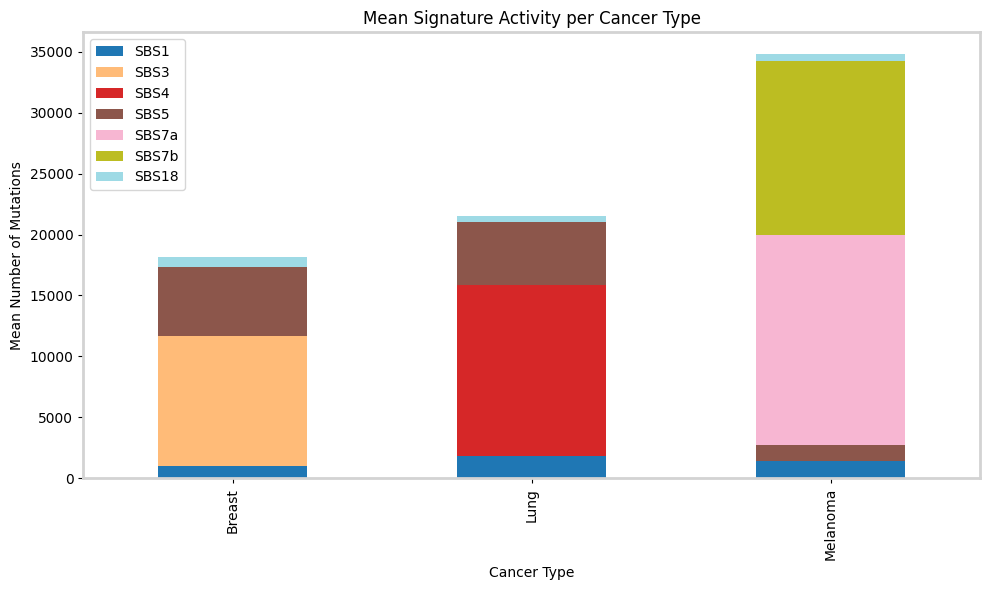

In [23]:
signature_cols = activities.columns
grouped = data.groupby("Cancer_Type")[signature_cols].mean()

import matplotlib.pyplot as plt

# Ensure inline display
%matplotlib inline

# Filter to signatures present in at least one cancer type
present_sigs = grouped.columns[(grouped.sum(axis=0) > 0)]
grouped_present = grouped[present_sigs]

# Create figure
fig, ax = plt.subplots(figsize=(10,6))

# Plot only present signatures
grouped_present.plot(
    kind='bar',
    stacked=True,
    colormap='tab20',
    ax=ax
)

# Labels and title
ax.set_ylabel("Mean Number of Mutations")
ax.set_xlabel("Cancer Type")
ax.set_title("Mean Signature Activity per Cancer Type")

# Layout and save
plt.tight_layout()
fig.savefig("/content/Mean_Signature_Activity_per_Cancer_Type.png", dpi=300, bbox_inches='tight')

# Show inline
plt.show()



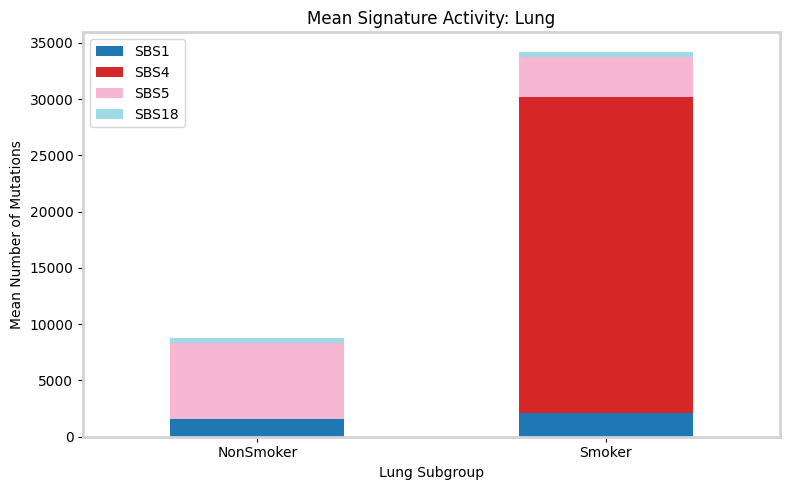

In [24]:
# Subset Lung samples
lung_data = data[data["Cancer_Type"] == "Lung"]

# Group by Subgroup (Smoker vs NonSmoker)
lung_grouped = lung_data.groupby("Subgroup")[signature_cols].mean()

# Filter to signatures present in at least one subgroup
present_sigs_lung = lung_grouped.columns[(lung_grouped.sum(axis=0) > 0)]
lung_grouped_present = lung_grouped[present_sigs_lung]

# Plot
fig, ax = plt.subplots(figsize=(8,5))
lung_grouped_present.plot(kind='bar', stacked=True, colormap='tab20', ax=ax)
ax.set_ylabel("Mean Number of Mutations")
ax.set_xlabel("Lung Subgroup")
ax.set_title("Mean Signature Activity: Lung")
plt.xticks(rotation=0)
plt.tight_layout()
fig.savefig("/content/Mean_Signature_Activity_Lung_Subgroups.png", dpi=300, bbox_inches='tight')
plt.show()



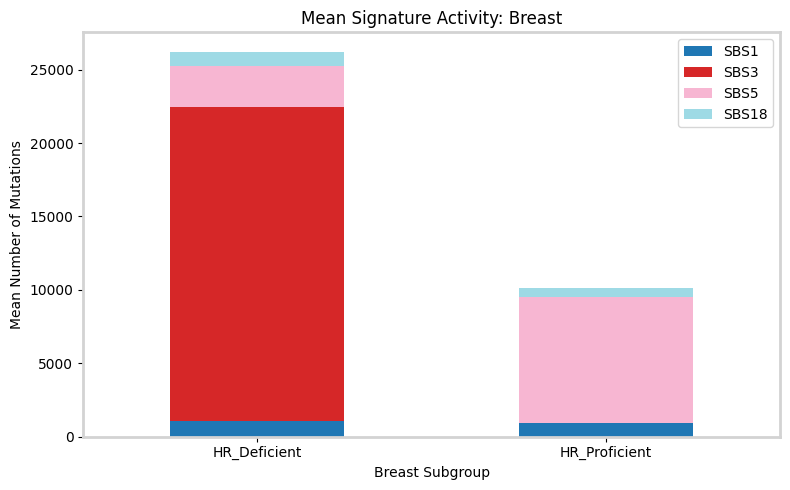

In [25]:
# Subset Breast samples
breast_data = data[data["Cancer_Type"] == "Breast"]

# Group by Subgroup
breast_grouped = breast_data.groupby("Subgroup")[signature_cols].mean()

# Filter to signatures present in at least one subgroup
present_sigs_breast = breast_grouped.columns[(breast_grouped.sum(axis=0) > 0)]
breast_grouped_present = breast_grouped[present_sigs_breast]

# Plot
fig, ax = plt.subplots(figsize=(8,5))
breast_grouped_present.plot(kind='bar', stacked=True, colormap='tab20', ax=ax)
ax.set_ylabel("Mean Number of Mutations")
ax.set_xlabel("Breast Subgroup")
ax.set_title("Mean Signature Activity: Breast")
plt.xticks(rotation=0)
plt.tight_layout()
fig.savefig("/content/Mean_Signature_Activity_Breast_Subgroups.png", dpi=300, bbox_inches='tight')
plt.show()

**Step 5 Questions:**


Using the outputs from SigProfilerAssignment and the generated plots:

*   Identify the dominant signature(s) for each subgroup and find the etiology using the COSMIC website https://cancer.sanger.ac.uk/signatures/sbs/
*   What additional metadata could you collect from patients to investigate variation in the levels of SBS4 in Lung cancers?
*  For signatures which contribute small numbers of mutations, how easy is it to spot the signatures in the mutational spectra? What other factors might make it harder to see a signature in the mutational spectra?





